In [207]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv
/kaggle/input/titanic-test-set/test.csv


In [208]:
#Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score

#import the Naive Bayes, logistic regression, bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [209]:
#Read training and testing data
train_data=pd.read_csv("../input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv")
test_data=pd.read_csv("../input/titanic-test-set/test.csv")

In [210]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [213]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
total=train_data.isnull().sum().sort_values(ascending=False)
percent_1=train_data.isnull().sum()/train_data.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2], axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [215]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [216]:
train_data['Embarked'].value_counts()/len(train_data)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

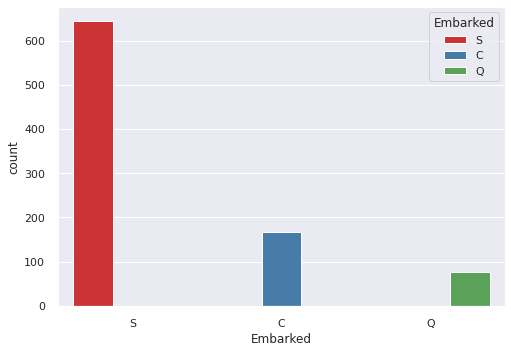

In [217]:
sns.set(style="darkgrid")
sns.countplot(x='Embarked', data=train_data, hue="Embarked", palette="Set1")

<AxesSubplot:xlabel='Survived', ylabel='count'>

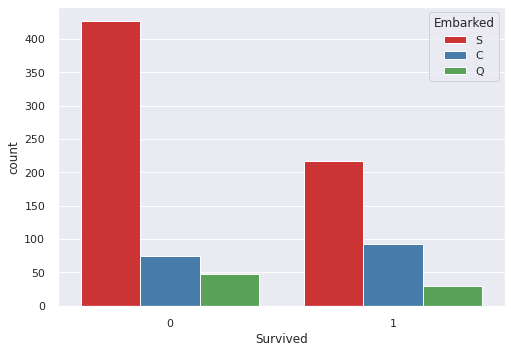

In [218]:
sns.set(style="darkgrid")
sns.countplot(x='Survived',data=train_data,hue="Embarked",palette="Set1")

In [219]:
train_data.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [220]:
train_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


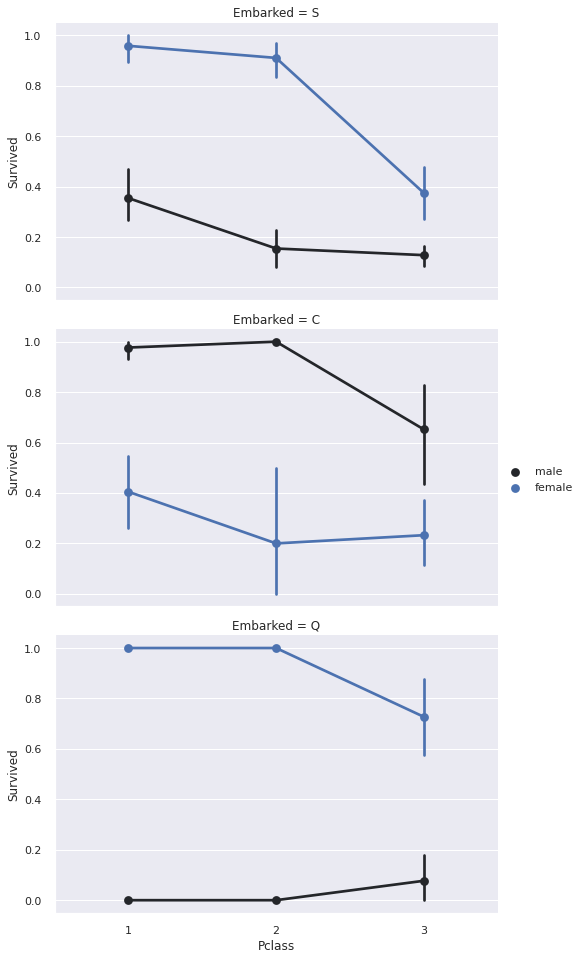

In [221]:
FacetGrid=sns.FacetGrid(train_data,row='Embarked',height=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',order=None,hue_order=None)
FacetGrid.add_legend();

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

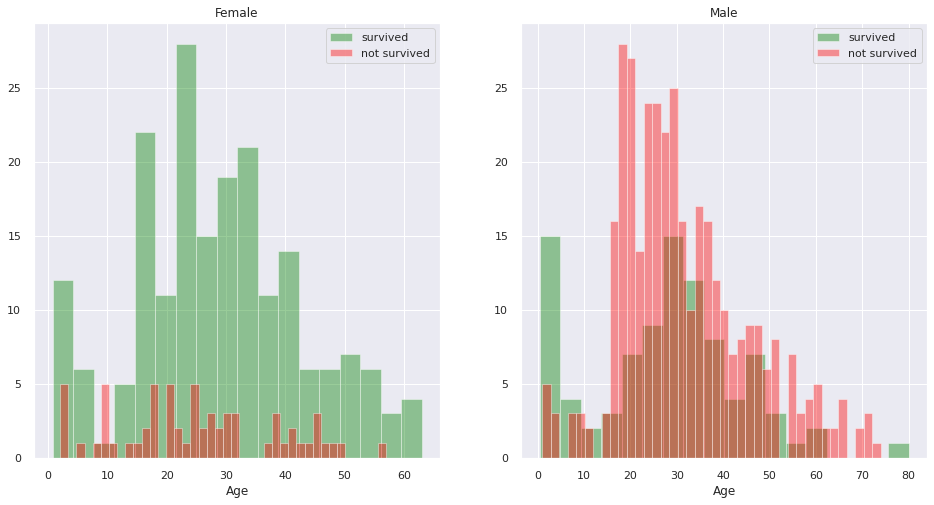

In [222]:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(16,8))
women=train_data[train_data['Sex']=='female']
men=train_data[train_data['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False,color="green")
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40, label=not_survived,ax=axes[0],kde=False,color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

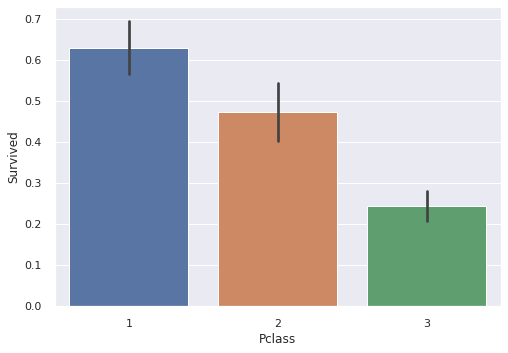

In [223]:
sns.barplot(x='Pclass',y='Survived',data=train_data)


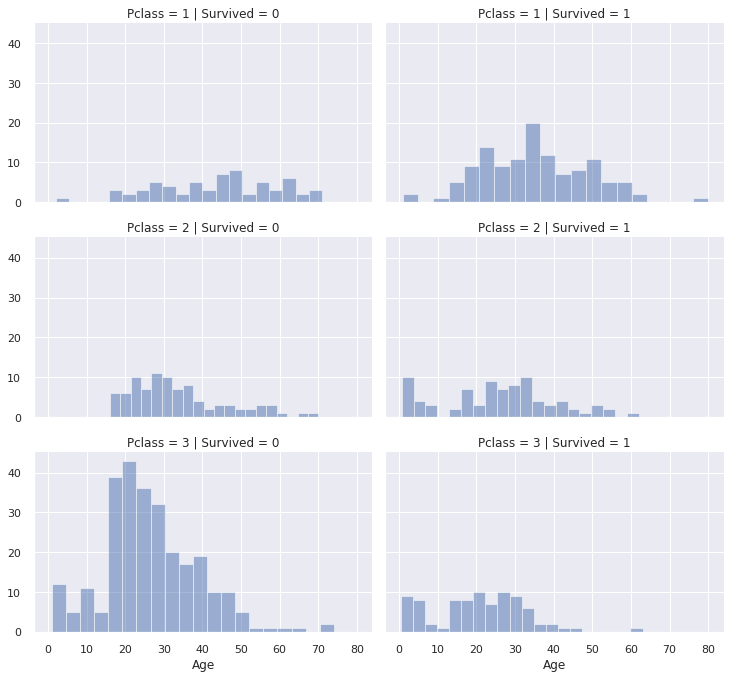

In [224]:
grid=sns.FacetGrid(train_data,col='Survived',row='Pclass',height=3.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend();

In [225]:
#combine siblings and parents
data=[train_data,test_data]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'travelled_alone']='No'
    dataset.loc[dataset['relatives']==0,'travelled_alone']='Yes'
train_data['travelled_alone'].value_counts()

Yes    537
No     354
Name: travelled_alone, dtype: int64

In [226]:
test_data['travelled_alone'].value_counts()

Yes    253
No     165
Name: travelled_alone, dtype: int64

In [227]:
train_data['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


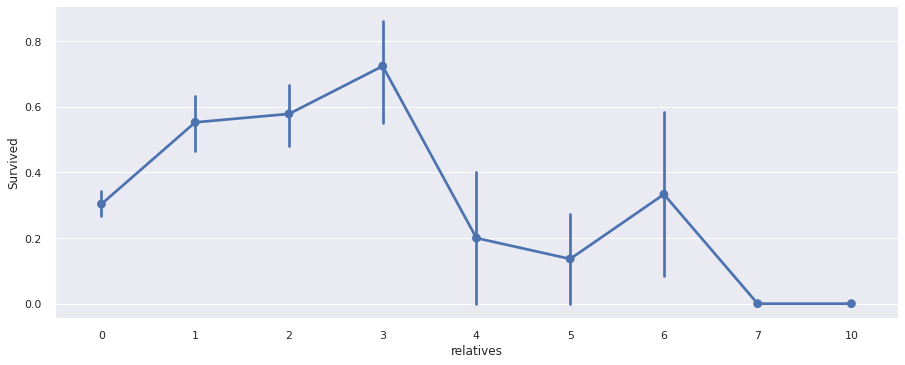

In [228]:
axes=sns.factorplot('relatives','Survived',data=train_data, aspect=2.5,);

In [229]:
#Data Pre-processing
#Drop passenger ID from train set
train_data=train_data.drop(['PassengerId'],axis=1)

In [230]:
#Cabin number looks like G6 where the letter refers to the deck. 
#We will use it to create a new feature.
train_data['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [231]:
import re
deck={"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}
data=[train_data,test_data]
for dataset in data:
    dataset['Cabin']=dataset['Cabin'].fillna("U0")
    dataset['Deck']=dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']=dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna("U")
train_data=train_data.drop(['Cabin'],axis=1)
test_data=test_data.drop(['Cabin'],axis=1)

In [232]:
train_data['Deck'].value_counts()

U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

In [233]:
train_data.groupby('Deck').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives
Deck,,,,,,,
A,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.266667
B,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.936170
C,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,1.118644
D,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.727273
E,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.625000
F,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,1.076923
G,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,1.750000
U,0.299419,2.636628,27.588208,0.546512,0.364826,19.181079,0.911337


In [234]:
test_data['Deck'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Deck, dtype: int64

In [235]:
#Fill nill values with random numbers based on mean and std. dev.
data=[train_data,test_data]
for dataset in data:
    mean=train_data["Age"].mean()
    std=test_data["Age"].std()
    is_null=dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age=np.random.randint(mean-std,mean+std,size=is_null)
    #fill NaN values in Age column with random values generated
    age_slice=dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset["Age"]=age_slice
    dataset["Age"]=train_data["Age"].astype(int)

In [236]:
train_data["Age"].isnull().sum()

0

In [237]:
test_data["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [238]:
train_data["Age"].describe()

count    891.000000
mean      29.452301
std       13.546040
min        0.000000
25%       20.500000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [239]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [240]:
train_data['Embarked'].mode()

0    S
dtype: object

In [241]:
common_value='S'
data=[train_data,test_data]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

In [242]:
test_data['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [243]:
#Converting featurews
data=[train_data,test_data]
for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [244]:
train_data['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [245]:
test_data['Fare'].isnull().sum()

0

In [246]:
train_data['Fare']=train_data['Fare'].astype(int)

In [247]:
test_data['Fare']=test_data['Fare'].astype(int)

In [248]:
#build features based on titles of individuals
train_titles=train_data.Name.str.extract('([A-Za-z]+)\.',expand=False)
type(train_titles)

pandas.core.series.Series

In [249]:
train_titles.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Lady          1
Countess      1
Mme           1
Ms            1
Don           1
Jonkheer      1
Capt          1
Name: Name, dtype: int64

In [250]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    #dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna("NA")
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [251]:
train_data.groupby(['Title']).mean()


,Survived,Pclass,Age,SibSp,Parch,Fare,relatives
Title,,,,,,,
Master,0.575000,2.625000,6.975000,2.300000,1.375000,34.250000,3.675000
Miss,0.702703,2.291892,23.691892,0.702703,0.540541,43.340541,1.243243
Mr,0.156673,2.410058,31.264990,0.288201,0.152805,24.021277,0.441006
Mrs,0.793651,1.992063,34.904762,0.690476,0.825397,44.984127,1.515873
Rare,0.347826,1.347826,44.260870,0.347826,0.086957,36.782609,0.434783


In [252]:
test_data.groupby(['Title']).mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives
Title,,,,,,,
Master,1123.380952,2.714286,28.809524,1.571429,1.380952,38.142857,2.952381
Miss,1100.240506,2.443038,27.645570,0.544304,0.392405,39.139241,0.936709
Mr,1101.279167,2.320833,28.625000,0.270833,0.175000,25.016667,0.445833
Mrs,1090.097222,1.833333,29.513889,0.597222,0.833333,59.611111,1.430556
Rare,1117.500000,1.333333,27.500000,0.500000,0.333333,80.500000,0.833333


In [253]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [254]:
'''
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

'''

'\ngenders = {"male": 0, "female": 1}\ndata = [train_df, test_df]\n\nfor dataset in data:\n    dataset[\'Sex\'] = dataset[\'Sex\'].map(genders)\n\n'

In [255]:
train_data['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [256]:
test_data['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [257]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [258]:
'''
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
'''

'\nports = {"S": 0, "C": 1, "Q": 2}\ndata = [train_data, test_data]\n\nfor dataset in data:\n    dataset[\'Embarked\'] = dataset[\'Embarked\'].map(ports)\n    \n'

In [259]:
#Create New Features
#Age class
data = [train_data, test_data]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [260]:
#Fare per person 
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [261]:
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    
    dataset['Age'] = dataset['Age'].astype(str)
    dataset.loc[ dataset['Age'] == '0', 'Age'] = "Children"
    dataset.loc[ dataset['Age'] == '1', 'Age'] = "Teens"
    dataset.loc[ dataset['Age'] == '2', 'Age'] = "Youngsters"
    dataset.loc[ dataset['Age'] == '3', 'Age'] = "Young Adults"
    dataset.loc[ dataset['Age'] == '4', 'Age'] = "Adults"
    dataset.loc[ dataset['Age'] == '5', 'Age'] = "Middle Age"
    dataset.loc[ dataset['Age'] == '6', 'Age'] = "Senior"
    dataset.loc[ dataset['Age'] == '7', 'Age'] = "Retired"

# let's see how it's distributed 
train_data['Age'].value_counts()

Adults          167
Senior          154
Middle Age      148
Young Adults    133
Youngsters      109
Teens           105
Children         68
Retired           7
Name: Age, dtype: int64

In [262]:
test_data['Age'].value_counts()


Adults          79
Middle Age      68
Young Adults    66
Senior          64
Youngsters      59
Teens           47
Children        33
Retired          2
Name: Age, dtype: int64

In [263]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    int64 
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 97.6+ KB


In [264]:
train_data['Fare']

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64

In [265]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset['Fare'] = dataset['Fare'].astype(str)
    dataset.loc[ dataset['Fare'] == '0', 'Fare'] = "Extremely Low"
    dataset.loc[ dataset['Fare'] == '1', 'Fare'] = "Very Low"
    dataset.loc[ dataset['Fare'] == '2', 'Fare'] = "Low"
    dataset.loc[ dataset['Fare'] == '3', 'Fare'] = "High"
    dataset.loc[ dataset['Fare'] == '4', 'Fare'] = "Very High"
    dataset.loc[ dataset['Fare'] == '5', 'Fare'] = "Extremely High"

In [266]:
train_data['Fare'].value_counts()

Extremely Low     241
Low               223
Very Low          216
High              158
Very High          44
Extremely High      9
Name: Fare, dtype: int64

In [267]:
test_data['Fare'].value_counts()

Extremely Low     120
Low               102
Very Low           96
High               69
Very High          23
Extremely High      8
Name: Fare, dtype: int64

In [268]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 97.6+ KB


In [269]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      418 non-null    int64 
 1   Pclass           418 non-null    int64 
 2   Sex              418 non-null    object
 3   Age              418 non-null    object
 4   SibSp            418 non-null    int64 
 5   Parch            418 non-null    int64 
 6   Fare             418 non-null    object
 7   Embarked         418 non-null    object
 8   relatives        418 non-null    int64 
 9   travelled_alone  418 non-null    object
 10  Deck             418 non-null    object
 11  Title            418 non-null    object
 12  Age_Class        418 non-null    int64 
 13  Fare_Per_Person  418 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 45.8+ KB


In [270]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 97.6+ KB


In [271]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      418 non-null    int64 
 1   Pclass           418 non-null    int64 
 2   Sex              418 non-null    object
 3   Age              418 non-null    object
 4   SibSp            418 non-null    int64 
 5   Parch            418 non-null    int64 
 6   Fare             418 non-null    object
 7   Embarked         418 non-null    object
 8   relatives        418 non-null    int64 
 9   travelled_alone  418 non-null    object
 10  Deck             418 non-null    object
 11  Title            418 non-null    object
 12  Age_Class        418 non-null    int64 
 13  Fare_Per_Person  418 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 45.8+ KB


In [272]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [273]:
data = [train_data, test_data]

for dataset in data:
    dataset['Pclass'] = dataset['Pclass'].astype(str)
    dataset.loc[ dataset['Pclass'] == '1', 'Pclass'] = "Class1"
    dataset.loc[ dataset['Pclass'] == '2', 'Pclass'] = "Class2"
    dataset.loc[ dataset['Pclass'] == '3', 'Pclass'] = "Class3"

In [274]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    object
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   relatives        891 non-null    int64 
 9   travelled_alone  891 non-null    object
 10  Deck             891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Fare_Per_Person  891 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 97.6+ KB


In [275]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      418 non-null    int64 
 1   Pclass           418 non-null    object
 2   Sex              418 non-null    object
 3   Age              418 non-null    object
 4   SibSp            418 non-null    int64 
 5   Parch            418 non-null    int64 
 6   Fare             418 non-null    object
 7   Embarked         418 non-null    object
 8   relatives        418 non-null    int64 
 9   travelled_alone  418 non-null    object
 10  Deck             418 non-null    object
 11  Title            418 non-null    object
 12  Age_Class        418 non-null    int64 
 13  Fare_Per_Person  418 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 45.8+ KB


In [276]:
train_data['Pclass'].value_counts()

Class3    491
Class1    216
Class2    184
Name: Pclass, dtype: int64

In [277]:
#Scaling the numerical data
data=[train_data,test_data]
train_numerical_features=list(train_data.select_dtypes(include=['int64','float64','int32']).columns)
train_numerical_features

['Survived', 'SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [278]:
type(train_numerical_features)

list

In [279]:
del train_numerical_features[0]
train_numerical_features

['SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [280]:
#Feature scaling - standard scaler
ss_scaler = StandardScaler()
train_data_ss = pd.DataFrame(data = train_data)
train_data_ss[train_numerical_features] = ss_scaler.fit_transform(train_data_ss[train_numerical_features])

In [281]:
train_data_ss.shape

(891, 14)

In [282]:
train_data_ss.shape

(891, 14)

In [283]:
train_data_ss.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,Class3,male,Youngsters,0.432793,-0.473674,Extremely Low,S,0.059160,No,U,Mr,0.046052,-0.459218
1,1,Class1,female,Middle Age,0.432793,-0.473674,High,C,0.059160,No,C,Mrs,-0.771086,0.434090
2,1,Class3,female,Young Adults,-0.474545,-0.473674,Extremely Low,S,-0.560975,Yes,U,Miss,0.396254,-0.347554
3,1,Class1,female,Middle Age,0.432793,-0.473674,High,S,0.059160,No,C,Mrs,-0.858637,0.182847
4,0,Class3,male,Middle Age,-0.474545,-0.473674,Very Low,S,-0.560975,Yes,U,Mr,1.184208,-0.319638


In [284]:
test_numerical_features = list(test_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId', 'SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [285]:
del test_numerical_features[0]
test_numerical_features

['SibSp', 'Parch', 'relatives', 'Age_Class', 'Fare_Per_Person']

In [286]:
# Feature scaling - Standard scaler
test_ss_scaler = StandardScaler()
test_data_ss = pd.DataFrame(data = test_data)
test_data_ss[test_numerical_features] = test_ss_scaler.fit_transform(test_data_ss[test_numerical_features])

In [287]:
test_data.shape

(418, 14)

In [288]:
test_data_ss.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,travelled_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,Class3,male,Youngsters,-0.499470,-0.400248,Extremely Low,Q,-0.553443,Yes,U,Mr,0.019528,-0.401204
1,893,Class3,female,Middle Age,0.616992,-0.400248,Extremely Low,S,0.105643,No,U,Mrs,1.214046,-0.513662
2,894,Class2,male,Young Adults,-0.499470,-0.400248,Very Low,Q,-0.553443,Yes,U,Mr,-0.328874,-0.344975
3,895,Class3,male,Middle Age,-0.499470,-0.400248,Very Low,S,-0.553443,Yes,U,Mr,0.990074,-0.373089
4,896,Class3,female,Middle Age,0.616992,0.619896,Very Low,S,0.764728,No,U,Mrs,0.990074,-0.485547


In [289]:
# One-Hot encoding / Dummy variables for training data
encode_col_list = list(train_data.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_data_ss = pd.concat([train_data_ss,pd.get_dummies(train_data_ss[i], prefix=i)],axis=1)
    train_data_ss.drop(i, axis = 1, inplace=True)

In [290]:
train_data_ss.shape

(891, 43)

In [291]:
#One-Hot encoding / Dummy Variables for testing data
test_encode_col_list = list(test_data.select_dtypes(include=['object']).columns)
for i in test_encode_col_list:
    test_data_ss = pd.concat([test_data_ss,pd.get_dummies(test_data_ss[i], prefix=i)],axis=1)
    test_data_ss.drop(i, axis = 1, inplace=True)

In [331]:
train_data_ss.head()

,Survived,SibSp,Parch,relatives,Age_Class,Fare_Per_Person,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0.432793,-0.473674,0.059160,0.046052,-0.459218,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.432793,-0.473674,0.059160,-0.771086,0.434090,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,-0.474545,-0.473674,-0.560975,0.396254,-0.347554,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,0.432793,-0.473674,0.059160,-0.858637,0.182847,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.474545,-0.473674,-0.560975,1.184208,-0.319638,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [293]:
test_data_ss.head()

,PassengerId,SibSp,Parch,relatives,Age_Class,Fare_Per_Person,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,-0.499470,-0.400248,-0.553443,0.019528,-0.401204,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,893,0.616992,-0.400248,0.105643,1.214046,-0.513662,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
2,894,-0.499470,-0.400248,-0.553443,-0.328874,-0.344975,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,895,-0.499470,-0.400248,-0.553443,0.990074,-0.373089,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,896,0.616992,0.619896,0.764728,0.990074,-0.485547,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0


In [294]:
X_train=train_data_ss.drop("Survived",axis=1)
Y_train=train_data_ss["Survived"]
X_test=test_data_ss.drop("PassengerId",axis=1).copy()

In [295]:
X_train.shape


(891, 42)

In [296]:
Y_train.shape


(891,)

In [297]:
X_test.shape


(418, 42)

In [298]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SibSp                891 non-null    float64
 1   Parch                891 non-null    float64
 2   relatives            891 non-null    float64
 3   Age_Class            891 non-null    float64
 4   Fare_Per_Person      891 non-null    float64
 5   Pclass_Class1        891 non-null    uint8  
 6   Pclass_Class2        891 non-null    uint8  
 7   Pclass_Class3        891 non-null    uint8  
 8   Sex_female           891 non-null    uint8  
 9   Sex_male             891 non-null    uint8  
 10  Age_Adults           891 non-null    uint8  
 11  Age_Children         891 non-null    uint8  
 12  Age_Middle Age       891 non-null    uint8  
 13  Age_Retired          891 non-null    uint8  
 14  Age_Senior           891 non-null    uint8  
 15  Age_Teens            891 non-null    uin

In [326]:
#Logistic Regression
# Initiate model
logreg = LogisticRegression()

# Fit our model to the training data
logreg.fit(X_train, Y_train)

# Predict on the test data
logreg_predictions = logreg.predict(X_test)

logreg_data = pd.read_csv('test.csv')
logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)



In [325]:
ls

test.csv


In [324]:
cd input/titanic-test-set/

/kaggle/input/titanic-test-set


In [328]:
cd /kaggle/working

/kaggle/working


In [329]:
logreg_data.to_csv('LogisticRegression_v2.csv')